In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import statsmodels.api as sm
 from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"Social_Network_Ads.csv")

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
df.duplicated().value_counts()

False    367
True      33
Name: count, dtype: int64

<Axes: >

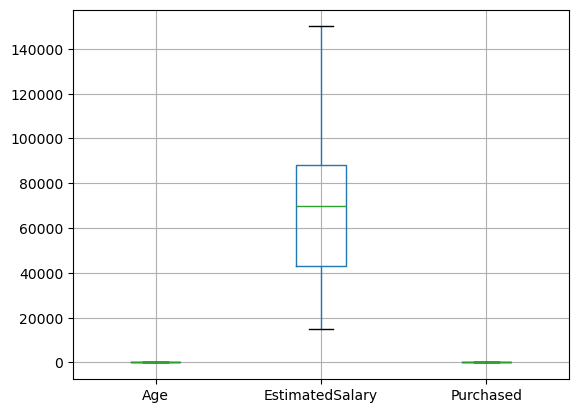

In [6]:
df.boxplot()

In [7]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [9]:
x = df.iloc[:,0:2] #independent vatiable
y = df['Purchased']

In [10]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 1)

In [12]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,y_train)
LR

LogisticRegression()

In [13]:
y_pred = LR.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.83

In [15]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[52,  6],
       [11, 31]], dtype=int64)

In [16]:
TP = con_matrix[1,1]
TN = con_matrix[0,0]
FP = con_matrix[0,1]
FN = con_matrix[1,0]

In [17]:
precision = TP / (TP + FP)
precision

0.8378378378378378

In [18]:
recall =  TP / (TP + FN)
recall

0.7380952380952381

In [19]:
Acc = (TP+TN) / (TP+TN+FP+FN)
Acc

0.83

In [20]:
import statsmodels.api as sm 
log_reg = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.417155
         Iterations 7


In [21]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Sat, 27 Apr 2024   Pseudo R-squ.:                  0.3602
Time:                        06:22:52   Log-Likelihood:                -166.86
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 9.373e-43
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0150      0.216      9.313      0.000       1.591       2.439
x2             1.0723      0.174      6.159      0.000       0.731       1.414


# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y1_pred = classifier.predict(X_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1),y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y1_pred)

0.88

In [25]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[52,  6],
       [11, 31]], dtype=int64)

# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
class_nb = GaussianNB()
class_nb .fit(X_train,y_train)

GaussianNB()

In [27]:
y2_pred = class_nb.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y2_pred)

0.86

In [29]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test,y2_pred)
con_matrix

array([[51,  7],
       [ 7, 35]], dtype=int64)

# Bank Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv(r"bank.csv")
df

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,5,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,1,0,no
4518,57,technician,married,secondary,no,295,no,no,11,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,4,3,no


In [3]:
df['subscribed'].value_counts(normalize = True)

subscribed
no     0.88476
yes    0.11524
Name: proportion, dtype: float64

In [4]:
from sklearn.utils import resample
#seperate the case of yes-no subscribe and no-subscribe
bank_subs_no = df[df.subscribed == 'no']
bank_subs_yes = df[df.subscribed == 'yes']
    
#Upsample the yes-subs cases
df_minority_upsampled = resample(bank_subs_yes,replace =True, n_samples = 2000)
    
#Combine majority class with upsampled minority class
new_df = pd.concat([bank_subs_no, df_minority_upsampled])

In [5]:
new_df

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
1458,36,management,married,tertiary,no,2987,yes,no,1,0,yes
4089,32,blue-collar,married,secondary,yes,-53,yes,no,1,1,yes
1249,60,blue-collar,married,primary,no,493,no,no,4,0,yes
2891,32,management,single,tertiary,no,0,no,no,4,0,yes


In [6]:
X = pd.get_dummies(new_df[['age','job','marital','education','default','balance',
                           'housing-loan', 'personal-loan', 'current-campaign','previous-campaign']])
X

,age,balance,current-campaign,previous-campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing-loan_no,housing-loan_yes,personal-loan_no,personal-loan_yes
0,30,1787,1,0,False,False,False,False,False,False,...,True,False,False,False,True,False,True,False,True,False
1,33,4789,1,4,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,True
2,35,1350,1,1,False,False,False,False,True,False,...,False,False,True,False,True,False,False,True,True,False
3,30,1476,4,0,False,False,False,False,True,False,...,False,False,True,False,True,False,False,True,False,True
4,59,0,1,0,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,36,2987,1,0,False,False,False,False,True,False,...,False,False,True,False,True,False,False,True,True,False
4089,32,-53,1,1,False,True,False,False,False,False,...,False,True,False,False,False,True,False,True,True,False
1249,60,493,4,0,False,True,False,False,False,False,...,True,False,False,False,True,False,True,False,True,False
2891,32,0,4,0,False,False,False,False,True,False,...,False,False,True,False,True,False,True,False,True,False


In [7]:
Y = new_df.replace(to_replace = ['yes','no'],value=[1,0])['subscribed']
Y

0       0
1       0
2       0
3       0
4       0
       ..
1458    1
4089    1
1249    1
2891    1
1693    1
Name: subscribed, Length: 6000, dtype: int64

In [8]:
Y.value_counts()

subscribed
0    4000
1    2000
Name: count, dtype: int64

In [9]:
from sklearn import preprocessing
X1 = preprocessing.StandardScaler().fit(X).transform(X)

In [10]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y,test_size=0.25,random_state = 1)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =5, metric = 'minkowski', p=2)
classifier.fit(x1_train, y1_train)
y_pred = classifier.predict(x1_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test,y_pred)

0.7766666666666666

In [13]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y1_test.values.reshape(len(y1_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test,y_pred)

0.7766666666666666

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =5, metric = 'minkowski', p=2)
classifier.fit(x1_train, y1_train)

KNeighborsClassifier()

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [17]:
pred_y = classifier.predict(x1_test)
accuracy_score(y1_test,pred_y)
cm = confusion_matrix(y1_test, pred_y)

In [18]:
cm

array([[798, 206],
       [129, 367]], dtype=int64)

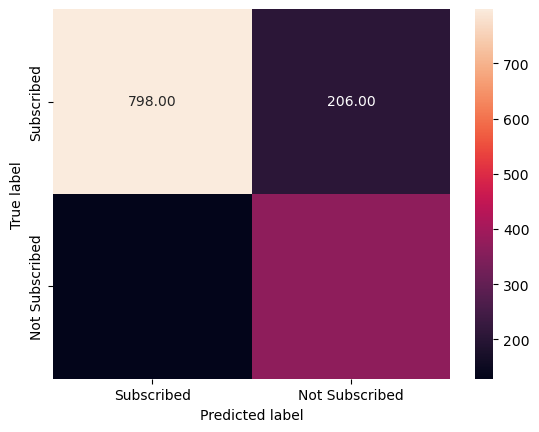

In [19]:
sns.heatmap(cm,annot=True, fmt = '.2f', xticklabels = ['Subscribed', 'Not Subscribed'],
            yticklabels = ['Subscribed', 'Not Subscribed'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
print(classification_report(y1_test,pred_y))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1004
           1       0.64      0.74      0.69       496

    accuracy                           0.78      1500
   macro avg       0.75      0.77      0.76      1500
weighted avg       0.79      0.78      0.78      1500



In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
hyperparameters = [{'n_neighbors': range(5,10),'metric':['canberra','euclidean','minkowski']}]

In [23]:
optimal_parameter_model = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv = 10, scoring = 'roc_auc')

In [24]:
optimal_parameter_model.fit(x1_train,y1_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             scoring='roc_auc')

In [25]:
print("Best Score: ", optimal_parameter_model.best_score_)
print("Optimal parameters:", optimal_parameter_model.best_params_)

Best Score:  0.8417401366832291
Optimal parameters: {'metric': 'canberra', 'n_neighbors': 5}


# Practical - 7

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
#using gini index
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)
clf_gini.fit(x1_train,y1_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [28]:
from sklearn import tree
print(tree.export_text(clf_gini))

|--- feature_3 <= -0.09
|   |--- feature_0 <= 1.71
|   |   |--- feature_17 <= -0.19
|   |   |   |--- class: 0
|   |   |--- feature_17 >  -0.19
|   |   |   |--- class: 0
|   |--- feature_0 >  1.71
|   |   |--- feature_1 <= -0.44
|   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.44
|   |   |   |--- class: 1
|--- feature_3 >  -0.09
|   |--- feature_26 <= -0.06
|   |   |--- feature_5 <= 0.79
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.79
|   |   |   |--- class: 0
|   |--- feature_26 >  -0.06
|   |   |--- feature_1 <= -0.16
|   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.16
|   |   |   |--- class: 1



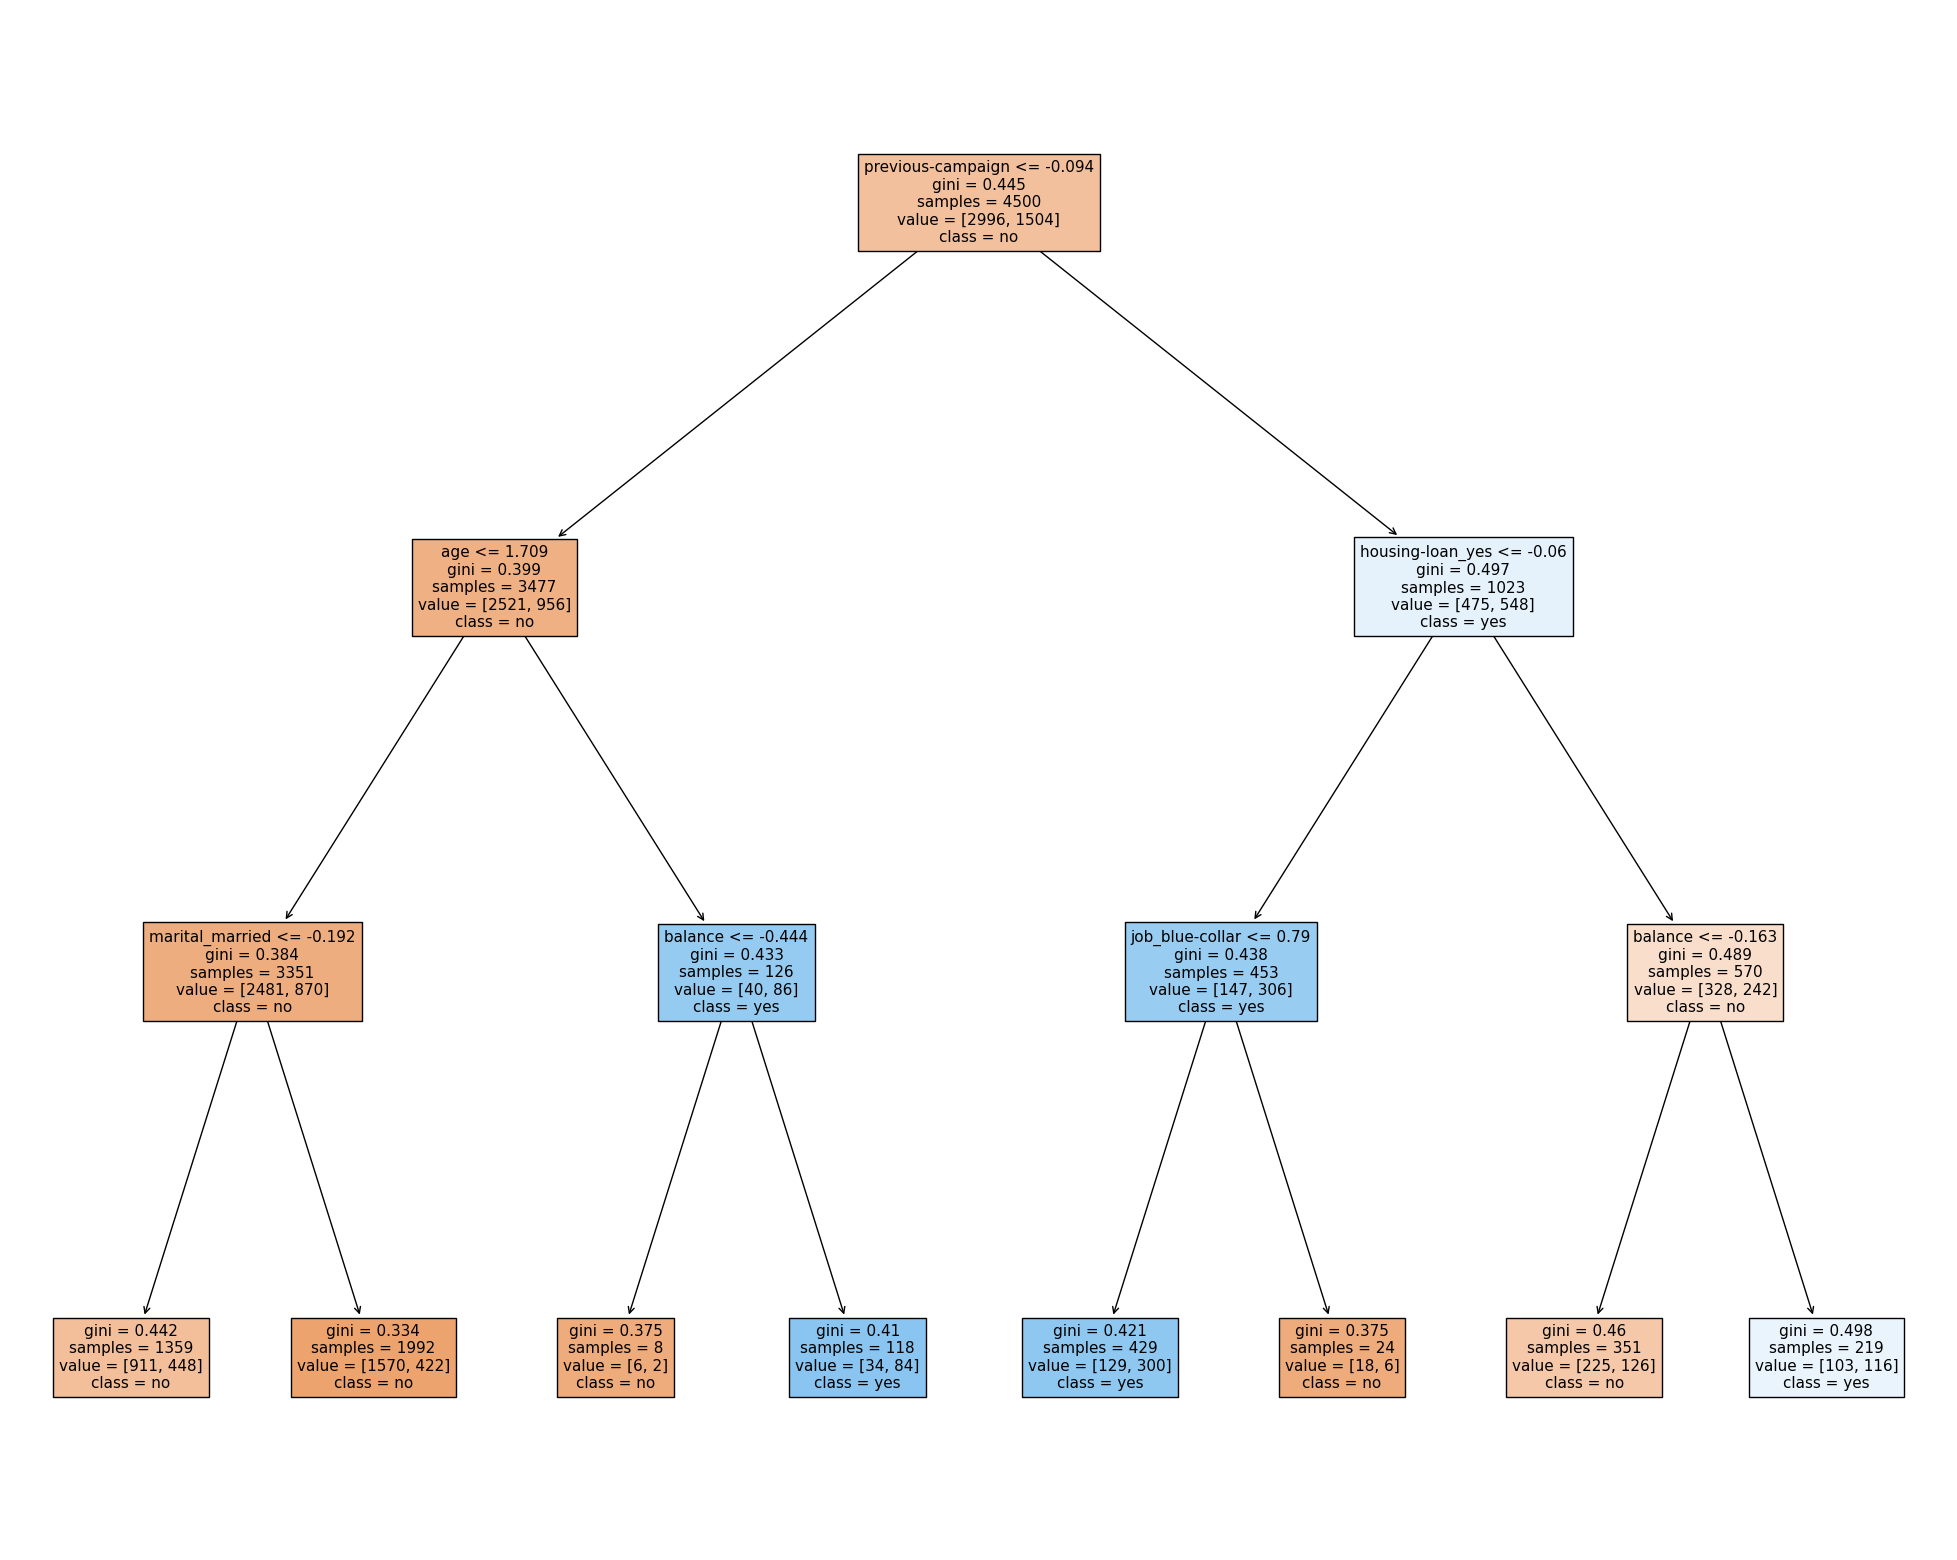

In [29]:
fig=plt.figure(figsize=(25,20))
tree.plot_tree(clf_gini,feature_names= list(X.columns),class_names=['no','yes'],filled=True)
plt.show()

In [30]:
#using entropy
clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x1_train,y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [31]:
from sklearn import metrics
pred_y=clf_entropy.predict(x1_test)
metrics.accuracy_score(y1_test,pred_y)

0.7173333333333334

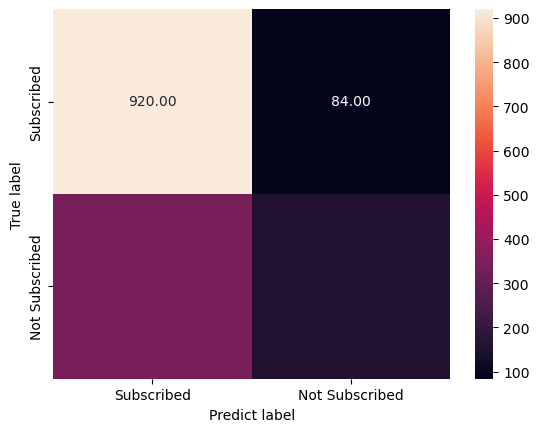

In [32]:
cm=metrics.confusion_matrix(y1_test,pred_y)
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Subscribed','Not Subscribed'], 
yticklabels = ['Subscribed', 'Not Subscribed'])
plt.ylabel('True label')
plt.ylabel('True label')
plt.xlabel('Predict label')
plt.show()

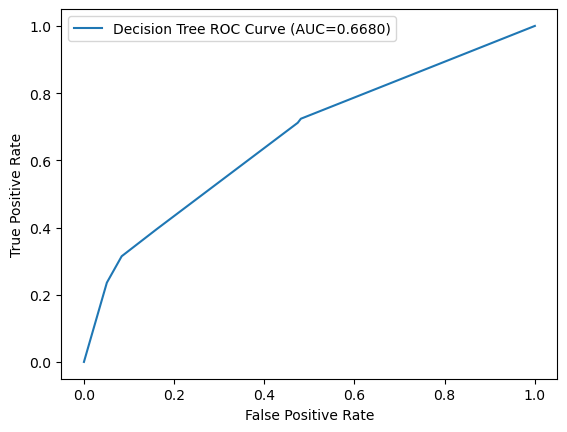

In [33]:
y_prob=clf_entropy.predict_proba(x1_test)
y_prob
fpr=metrics.roc_curve(y1_test,y_prob[:,1])[0]
tpr=metrics.roc_curve(y1_test,y_prob[:,1])[1]
dt_auc=metrics.roc_auc_score(y1_test,y_prob[:,1])
plt.plot(fpr,tpr,label='Decision Tree ROC Curve (AUC=%.4f)' % (dt_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
hyperparameters = [{'criterion':["gini","entropy"],'max_depth': range(3,20), 'min_samples_leaf': range(5,10)}]

In [36]:
optimal_parameter_model = GridSearchCV(DecisionTreeClassifier(), hyperparameters, cv = 10, scoring = 'roc_auc')

In [37]:
optimal_parameter_model.fit(x1_train,y1_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(3, 20),
                          'min_samples_leaf': range(5, 10)}],
             scoring='roc_auc')

In [38]:
print("Best Score: ", optimal_parameter_model.best_score_)
print("Optimal parameters:", optimal_parameter_model.best_params_)

Best Score:  0.8715021997287993
Optimal parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 5}
